<a href="https://colab.research.google.com/github/Alagucodein/Pythonlearning/blob/main/MLR_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 02Students.csv to 02Students.csv


In [4]:
df = pd.read_csv("02Students.csv")

In [ ]:
df

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


#Data Pre-Processing...

In [5]:
df.shape

(30, 3)

In [6]:
df.head()

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42


In [7]:
df.tail()

,Hours,sHours,Marks
25,9,5,67
26,9,8,89
27,10,8,81
28,10,8,82
29,11,7,79


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   sHours  30 non-null     int64
 2   Marks   30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [9]:
df.describe()

,Hours,sHours,Marks
count,30.000000,30.000000,30.000000
mean,5.200000,7.100000,61.400000
std,3.188341,0.922889,17.734828
min,0.000000,5.000000,33.000000
25%,3.000000,6.000000,45.250000
50%,5.000000,7.000000,60.000000
75%,7.750000,8.000000,77.000000
max,11.000000,8.000000,89.000000


#Data Cleaning not required since no null values..........

#Feature Selection.........

In [10]:
df

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


#Data Encoding not required since all values are numbers....

x,y split

In [45]:
x=df.iloc[:,0:3]

In [46]:
x

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


In [47]:
y=df.iloc[:,-1]

In [48]:
y

,Marks
0,34
1,36
2,33
3,39
4,42
5,45
6,38
7,45
8,53
9,46


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1234)

In [51]:
x_train.shape

(24, 3)

In [52]:
x_test.shape

(6, 3)

#Model building....

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_predict = lr.predict(x_test)

#evaluation....

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [58]:
MAE = mean_absolute_error(y_test,y_predict)

In [59]:
MSE = mean_squared_error(y_test,y_predict)

In [60]:
RMSE = np.sqrt(MSE)

In [61]:
MAE

2.3684757858670005e-15

In [62]:
MSE

1.6829032644714918e-29

In [63]:
R2 = r2_score(y_test,y_predict)

In [64]:
R2 #coeffiency of determination

1.0

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5) # Tranforming
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

ValueError: x and y must be the same size

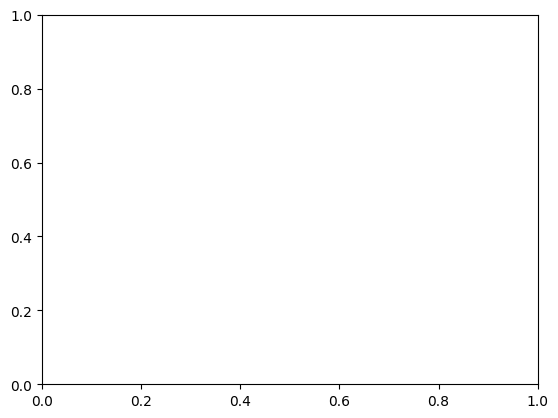

In [67]:
plt.scatter(x,y)
plt.plot(x, lin_reg.predict(x), color='red')
plt.title('Gaming Data (Linear Regression)')
plt.xlabel('Gaming Steps')
plt.ylabel('Points')
plt.show()

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5) # Tranforming
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

ValueError: x and y must be the same size

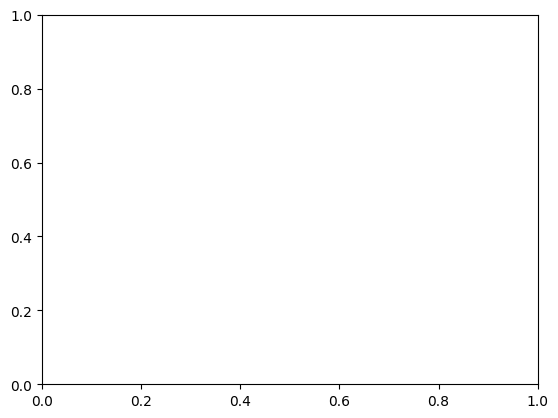

In [69]:
plt.scatter(x,y)
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='red')
plt.title('Gaming Data (Polynomial Regression)')
plt.xlabel('Gaming Steps')
plt.ylabel('Points')
plt.show()